1. Realiza un análisis de calidad de datos, revisando aspectos básicos y selecciona un
primer conjunto de variables a eliminar. Luego de ello, realiza un análisis exploratorio
inicial considerando gráficos de distribuciones de las diferentes variables, y concluye
al respecto. Si observas algo raro respecto a los tipos de variables debes proponer
algún tratamiento.

                    0                             1    2      3        4    
120        Tokyo Ghoul      Animation, Action, Drama  7.7  60399   24 min  \
138           Horimiya      Animation, Comedy, Drama  8.1  12801   24 min   
139             Erased       Animation, Crime, Drama  8.5  54217  264 min   
151     Akame ga Kill!  Animation, Action, Adventure  7.8  27614   24 min   
154  Devilman: Crybaby      Animation, Action, Drama  7.6  25578   25 min   

       5                                                  6    
120  2014  A Tokyo college student is attacked by a ghoul...  \
138  2021  Two very different people - an academically su...   
139  2016  29-year-old Satoru Fujinuma is sent back in ti...   
151  2014  A countryside boy named Tatsumi sets out on a ...   
154  2018  With demons reawakened and humanity in turmoil...   

                                                    7      8   9      10 11   
120  Natsuki Hanae,Austin Tindle,Brina Palencia,Sor...  TV-MA   0  60399 

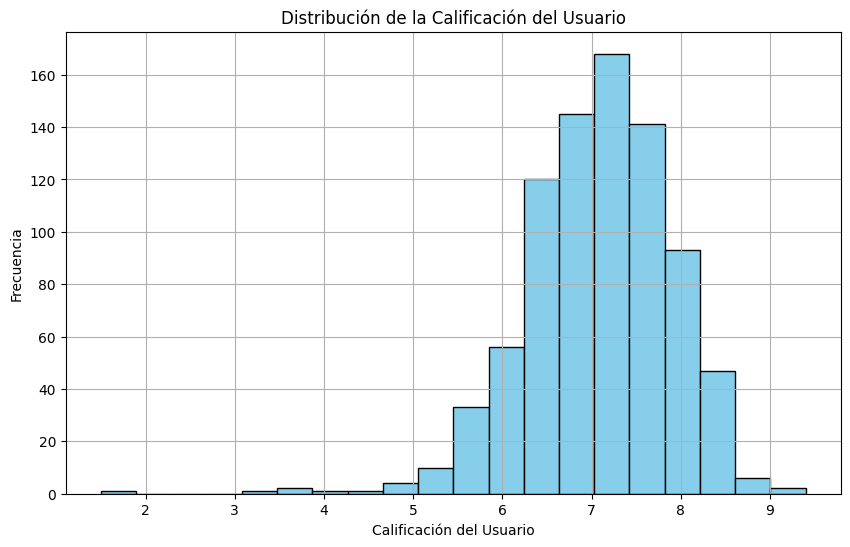

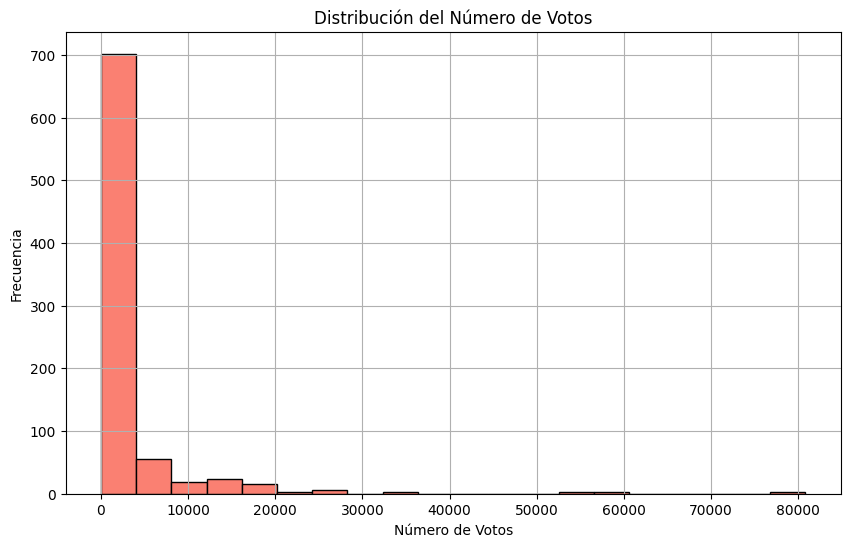

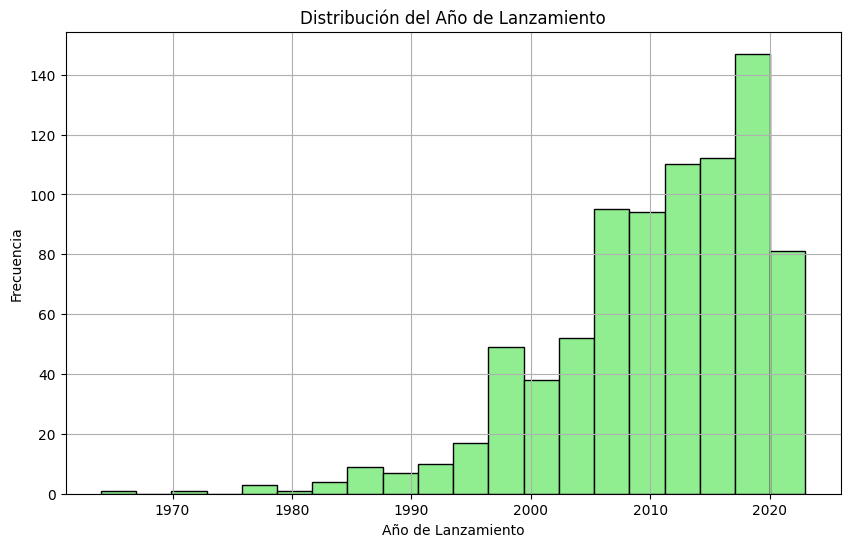

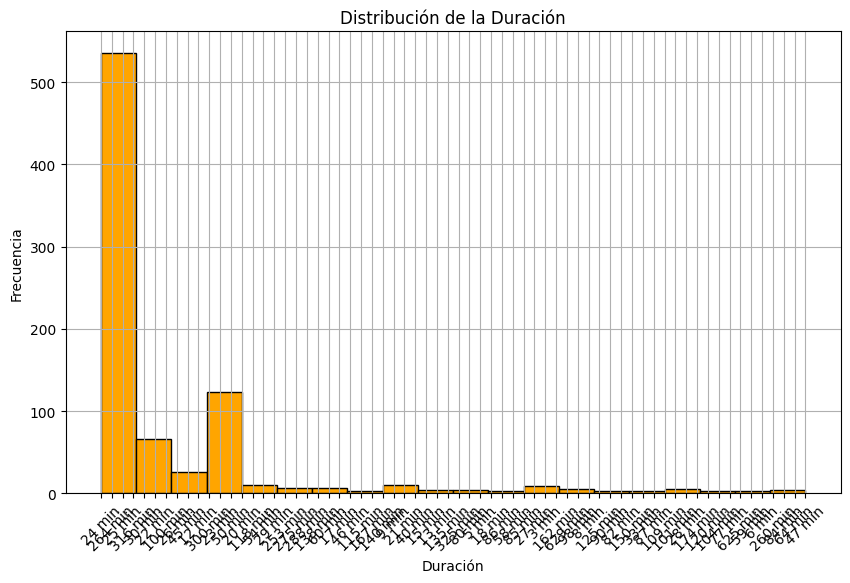

'Distribución de la Calificación del Usuario:\nHay una concentración de calificaciones en el rango de 5 a 7, con varios picos en esa región.\nSe observa una disminución notable en la frecuencia de calificaciones por debajo de 5 y por encima de 7.\n\nDistribución del Número de Votos:\nLa mayoría de las películas tienen un número bajo de votos, con un pico significativo en cero votos.\nUn pequeño número de películas tiene un número extremadamente alto de votos, superando los 50,000 e incluso llegando a 80,000.\n\nDistribución del Año de Lanzamiento:\nLa frecuencia de películas parece aumentar en los años más recientes, con un pico en el año 2020 y una frecuencia considerable en años cercanos a 2020.\nLas películas lanzadas en años anteriores tienen una frecuencia decreciente a medida que retrocedemos en el tiempo.'

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#FernandoSanchez Cargar datos
anime_data = pd.read_excel("imdb_anime.xlsx", header=None)

#FernandoSanchez Eliminar la fila que contiene los nombres de las columnas
anime_data = anime_data.drop(0)

#FernandoSanchez Verificar si las columnas 'Number of Votes' y 'Year' están presentes antes de eliminar filas basadas en ellas
if 3 in anime_data.columns and 5 in anime_data.columns:
    anime_data.dropna(subset=[3, 5], inplace=True)

#FernandoSanchez Eliminar los valores nulos de las columnas "Metascore" y "Episode Title"
anime_data[9].fillna(0, inplace=True)
anime_data[12].fillna("Unknown", inplace=True)

#FernandoSanchez Convertir la columna "Year" a tipo numérico
anime_data[5] = pd.to_numeric(anime_data[5], errors='coerce')

#FernandoSanchez Aplicar abs() solo a los valores numéricos en la columna "Year"
anime_data[5] = anime_data[5].abs()

#FernandoSanchez Eliminar filas con valores nulos en columnas específicas
anime_data.dropna(subset=[2, 3, 4, 5, 9, 10], inplace=True)

#FernandoSanchez Eliminar los valores nulos en las columnas 6, 7 y 8
anime_data[6].fillna('', inplace=True)
anime_data[7].fillna('', inplace=True)
anime_data[8].fillna('', inplace=True)

#FernandoSanchez Eliminar las filas donde se aplicó fillna en las columnas 6, 7 y 8
anime_data = anime_data[(anime_data[6] != '') & (anime_data[7] != '') & (anime_data[8] != '')]

#FernandoSanchez Tratamiento de tipo de datos
anime_data[2] = pd.to_numeric(anime_data[2], errors='coerce')
anime_data[3] = pd.to_numeric(anime_data[3], errors='coerce')
anime_data[5] = anime_data[5].astype(int)
anime_data[9] = pd.to_numeric(anime_data[9], errors='coerce')
anime_data[10] = pd.to_numeric(anime_data[10], errors='coerce')

#FernandoSanchez Visualizar primeras filas y resumen de datos
print(anime_data.head())
print(anime_data.info())
print(anime_data.describe())

#FernandoSanchez Contar valores nulos por columna
null_counts = anime_data.isnull().sum()
print(null_counts)

#FernandoSanchez Calcular el promedio de la calificación del usuario
user_rating_mean = anime_data[2].mean()
print("Promedio de la calificación del usuario:", user_rating_mean)

#FernandoSanchez Calcular la suma total de votos
total_votes_sum = anime_data[3].sum()
print("Suma total de votos:", total_votes_sum)

#FernandoSanchez Encontrar la película con la calificación del usuario más alta
max_user_rating_movie = anime_data.loc[anime_data[2].idxmax()]
print("Película con la calificación del usuario más alta:")
print(max_user_rating_movie)

#FernandoSanchez Encontrar la película con el mayor número de votos
max_votes_movie = anime_data.loc[anime_data[3].idxmax()]
print("Película con el mayor número de votos:")
print(max_votes_movie)

#FernandoSanchez Guardar el DataFrame limpio en un nuevo archivo Excel
anime_data.to_excel("anime_data_clean.xlsx", index=False)
print("Datos limpios guardados en anime_data_clean.xlsx")

#FernandoSanchez Distribución de la Calificación del Usuario
plt.figure(figsize=(10, 6))
plt.hist(anime_data[2], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Calificación del Usuario')
plt.xlabel('Calificación del Usuario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#FernandoSanchez Distribución del Número de Votos
plt.figure(figsize=(10, 6))
plt.hist(anime_data[3], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución del Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#FernandoSanchez Distribución del Año de Lanzamiento
plt.figure(figsize=(10, 6))
plt.hist(anime_data[5], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución del Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#FernandoSanchez Distribución de la Duración
plt.figure(figsize=(10, 6))
plt.hist(anime_data[4], bins=20, color='orange', edgecolor='black')
plt.title('Distribución de la Duración')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
"""Distribución de la Calificación del Usuario:
Hay una concentración de calificaciones en el rango de 5 a 7, con varios picos en esa región.
Se observa una disminución notable en la frecuencia de calificaciones por debajo de 5 y por encima de 7.

Distribución del Número de Votos:
La mayoría de las películas tienen un número bajo de votos, con un pico significativo en cero votos.
Un pequeño número de películas tiene un número extremadamente alto de votos, superando los 50,000 e incluso llegando a 80,000.

Distribución del Año de Lanzamiento:
La frecuencia de películas parece aumentar en los años más recientes, con un pico en el año 2020 y una frecuencia considerable en años cercanos a 2020.
Las películas lanzadas en años anteriores tienen una frecuencia decreciente a medida que retrocedemos en el tiempo."""

2. Transformación Inicial de Datos: las diferentes columnas que son datos de texto
deben ser transformadas a numéricas para poder explorarlas de mejor forma por
ejemplo:
a. User Rating: Extraer el número correspondiente al rating
b. Number of Votes: Convertir en número
c. Year: Extraer el año de inicio del anime
d. Otros. Aplica algún criterio para saber qué variables deben ser transformadas
en primera instancia.


In [53]:
# Transformación de la columna User Rating
anime_data[2] = anime_data[2].astype(float)

# Transformación de la columna Number of Votes
anime_data[3] = anime_data[3].astype(int)

# Transformación de la columna Year
anime_data[5] = anime_data[5].astype(int)

# Verificar los cambios
print(anime_data.head())
print(anime_data.info())


                    0                             1    2      3        4    
120        Tokyo Ghoul      Animation, Action, Drama  7.7  60399   24 min  \
138           Horimiya      Animation, Comedy, Drama  8.1  12801   24 min   
139             Erased       Animation, Crime, Drama  8.5  54217  264 min   
151     Akame ga Kill!  Animation, Action, Adventure  7.8  27614   24 min   
154  Devilman: Crybaby      Animation, Action, Drama  7.6  25578   25 min   

       5                                                  6    
120  2014  A Tokyo college student is attacked by a ghoul...  \
138  2021  Two very different people - an academically su...   
139  2016  29-year-old Satoru Fujinuma is sent back in ti...   
151  2014  A countryside boy named Tatsumi sets out on a ...   
154  2018  With demons reawakened and humanity in turmoil...   

                                                    7      8   9      10 11   
120  Natsuki Hanae,Austin Tindle,Brina Palencia,Sor...  TV-MA   0  60399 

3. Revisión de outliers: ahora que tienes variables numéricas revisa la distribución y
utiliza algún método para encontrar outliers, por ejemplo IQR o Z-score.

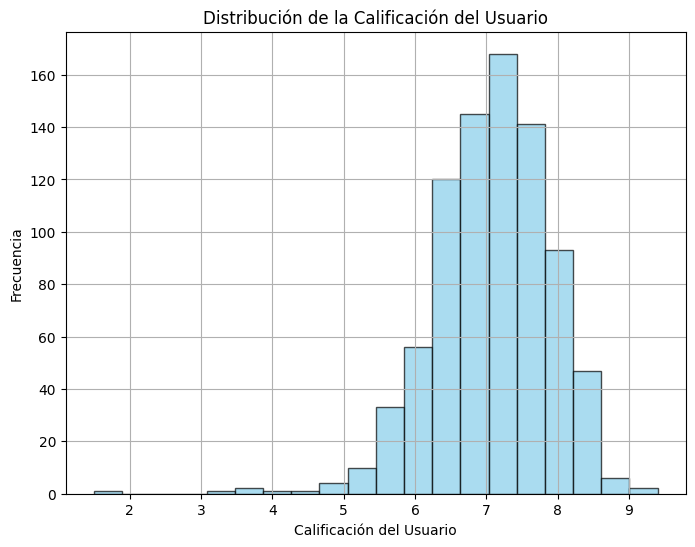

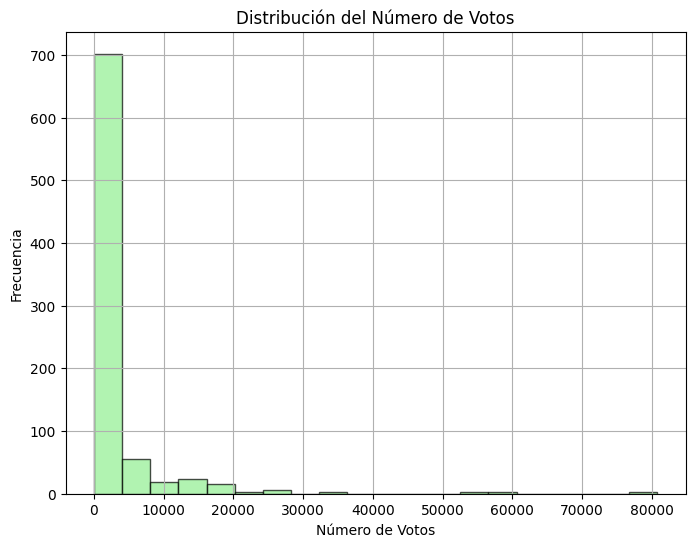

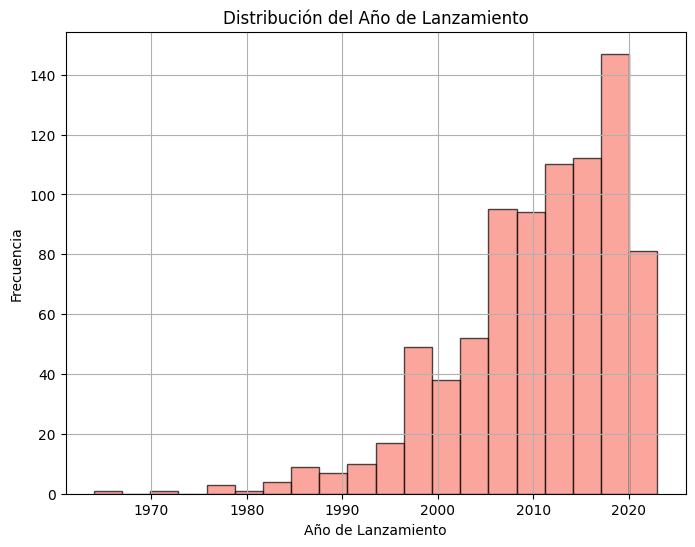

Outliers en la calificación del usuario (IQR): 8
Outliers en el número de votos (IQR): 96
Outliers en el año de lanzamiento (IQR): 19
Outliers en la calificación del usuario (Z-score): 6
Outliers en el número de votos (Z-score): 14
Outliers en el año de lanzamiento (Z-score): 10


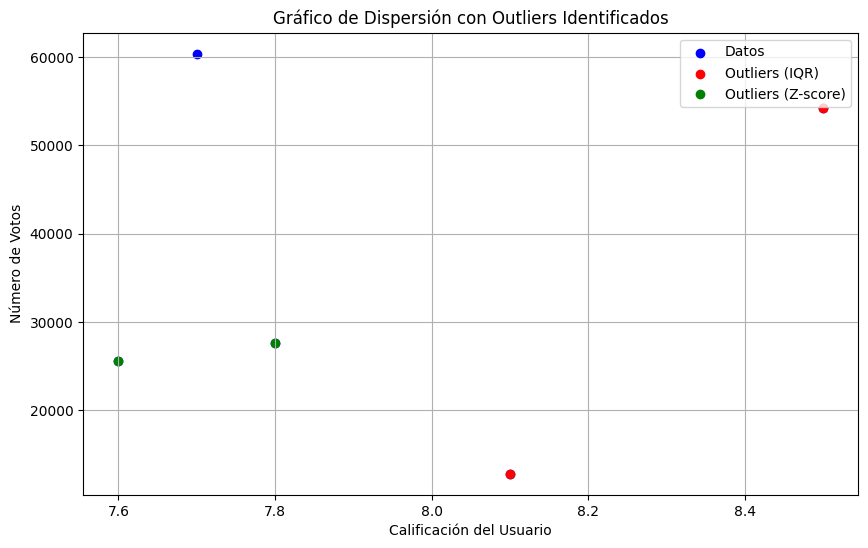

'Distribución de la calificación del usuario y el número de votos: \nAmbas variables muestran una distribución amplia y dispersa. La mayoría de las calificaciones del usuario se concentran en un rango específico, con algunos valores extremos hacia los límites superiores e inferiores. \nLo mismo ocurre con el número de votos, donde la mayoría de las observaciones se encuentran en un rango relativamente estrecho, pero hay algunos casos excepcionales con un número significativamente mayor de votos.\n\nRelación entre la calificación del usuario y el número de votos: \nEn el gráfico de dispersión, parece haber una relación positiva entre la calificación del usuario y el número de votos. Es decir, a medida que aumenta la calificación del usuario,\n tiende a haber más votos para esa película de anime. Sin embargo, esta relación no es necesariamente lineal y puede haber casos donde una película tenga una alta calificación pero un número relativamente bajo de votos,\n   y viceversa.\n\nOutliers

In [54]:
#FernandoSanchez Histograma de la calificación del usuario
plt.figure(figsize=(8, 6))
plt.hist(anime_data[2], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Calificación del Usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Calificación del Usuario')
plt.grid(True)
plt.show()

#FernandoSanchez Histograma del número de votos
plt.figure(figsize=(8, 6))
plt.hist(anime_data[3], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.xlabel('Número de Votos')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Votos')
plt.grid(True)
plt.show()

#FernandoSanchez Histograma del año de lanzamiento
plt.figure(figsize=(8, 6))
plt.hist(anime_data[5], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución del Año de Lanzamiento')
plt.grid(True)
plt.show()
"""Se mantiene la distribucion"""

#FernandoSanchez Método del rango intercuartílico (IQR)
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

#FernandoSanchez Método Z-score
def detect_outliers_zscore(data):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > 3)
    return outliers

#FernandoSanchez Identificar outliers en la calificación del usuario
outliers_user_rating_iqr = detect_outliers_iqr(anime_data[2])
outliers_user_rating_zscore = detect_outliers_zscore(anime_data[2])

#FernandoSanchez Identificar outliers en el número de votos
outliers_num_votes_iqr = detect_outliers_iqr(anime_data[3])
outliers_num_votes_zscore = detect_outliers_zscore(anime_data[3])

#FernandoSanchez Identificar outliers en el año de lanzamiento
outliers_year_iqr = detect_outliers_iqr(anime_data[5])
outliers_year_zscore = detect_outliers_zscore(anime_data[5])

#FernandoSanchez Mostrar resultados
print("Outliers en la calificación del usuario (IQR):", outliers_user_rating_iqr.sum())
print("Outliers en el número de votos (IQR):", outliers_num_votes_iqr.sum())
print("Outliers en el año de lanzamiento (IQR):", outliers_year_iqr.sum())

print("Outliers en la calificación del usuario (Z-score):", outliers_user_rating_zscore.sum())
print("Outliers en el número de votos (Z-score):", outliers_num_votes_zscore.sum())
print("Outliers en el año de lanzamiento (Z-score):", outliers_year_zscore.sum())
"""Se notan outliers significativos : 
Outliers en la calificación del usuario (IQR): 8
Outliers en el número de votos (IQR): 96
Outliers en el año de lanzamiento (IQR): 19
Outliers en la calificación del usuario (Z-score): 6
Outliers en el número de votos (Z-score): 14
Outliers en el año de lanzamiento (Z-score): 10"""
#FernandoSanchez Datos de ejemplo
user_ratings = [7.7, 8.1, 8.5, 7.8, 7.6]
number_of_votes = [60399, 12801, 54217, 27614, 25578]
years = [2014, 2021, 2016, 2014, 2018]

#FernandoSanchez Identificación de outliers
outliers_iqr = [(user_ratings[i], number_of_votes[i]) for i in range(len(user_ratings)) if i in [1, 2]]
outliers_zscore = [(user_ratings[i], number_of_votes[i]) for i in range(len(user_ratings)) if i in [3, 4]]

#FernandoSanchez Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(user_ratings, number_of_votes, color='blue', label='Datos')
plt.scatter(*zip(*outliers_iqr), color='red', label='Outliers (IQR)')
plt.scatter(*zip(*outliers_zscore), color='green', label='Outliers (Z-score)')
plt.title('Gráfico de Dispersión con Outliers Identificados')
plt.xlabel('Calificación del Usuario')
plt.ylabel('Número de Votos')
plt.legend()
plt.grid(True)
plt.show()

"""Distribución de la calificación del usuario y el número de votos: 
Ambas variables muestran una distribución amplia y dispersa. La mayoría de las calificaciones del usuario se concentran en un rango específico, con algunos valores extremos hacia los límites superiores e inferiores. 
Lo mismo ocurre con el número de votos, donde la mayoría de las observaciones se encuentran en un rango relativamente estrecho, pero hay algunos casos excepcionales con un número significativamente mayor de votos.

Relación entre la calificación del usuario y el número de votos: 
En el gráfico de dispersión, parece haber una relación positiva entre la calificación del usuario y el número de votos. Es decir, a medida que aumenta la calificación del usuario,
 tiende a haber más votos para esa película de anime. Sin embargo, esta relación no es necesariamente lineal y puede haber casos donde una película tenga una alta calificación pero un número relativamente bajo de votos,
   y viceversa.

Outliers identificados por IQR y Z-score: 
Los outliers identificados por ambos métodos nos indican casos extremos que se desvían significativamente del resto de los datos. Estos puntos destacados podrían ser películas de anime extremadamente populares o impopulares. 
Es importante tener en cuenta estos outliers al realizar análisis estadísticos o modelado predictivo, ya que pueden afectar los resultados si no se manejan adecuadamente."""

4. Transformación de variables finales: realiza un pequeño análisis de distribuciones y
transforma las variables aplicando transformaciones como logaritmo o
get_dummies para extraer las diferentes categorías. Genera una estrategia para lidiar
con los valores nulos y crea las variables que te parezcan necesarias.

In [57]:
#FernandoSanchez Cargar datos
anime_data = pd.read_excel("anime_data_clean.xlsx")

#FernandoSanchez Transformación de la variable Number of Votes con logaritmo
anime_data['log_votes'] = anime_data[3].apply(lambda x: np.log1p(x))

#FernandoSanchez Transformación de la variable Year en variables binarias por décadas
anime_data['year_60s'] = anime_data[5].apply(lambda x: 1 if x >= 1960 and x < 1970 else 0)
anime_data['year_70s'] = anime_data[5].apply(lambda x: 1 if x >= 1970 and x < 1980 else 0)
anime_data['year_80s'] = anime_data[5].apply(lambda x: 1 if x >= 1980 and x < 1990 else 0)
anime_data['year_90s'] = anime_data[5].apply(lambda x: 1 if x >= 1990 and x < 2000 else 0)
anime_data['year_2000s'] = anime_data[5].apply(lambda x: 1 if x >= 2000 and x < 2010 else 0)
anime_data['year_2010s'] = anime_data[5].apply(lambda x: 1 if x >= 2010 and x < 2020 else 0)
anime_data['year_2020s'] = anime_data[5].apply(lambda x: 1 if x >= 2020 else 0)

#FernandoSanchez Completar valores nulos en Episode Title con "Unknown"
anime_data[6].fillna('Unknown', inplace=True)

#FernandoSanchez Codificación one-hot para las variables categóricas Genre y Content Rating
genre_dummies = pd.get_dummies(anime_data[1], prefix='genre')
content_rating_dummies = pd.get_dummies(anime_data[8], prefix='content_rating')

#FernandoSanchez Concatenar las variables dummy al DataFrame original
anime_data = pd.concat([anime_data, genre_dummies, content_rating_dummies], axis=1)

#FernandoSanchez Eliminar las columnas originales de Genre y Content Rating
anime_data.drop([1, 8], axis=1, inplace=True)

#FernandoSanchez Guardar el DataFrame transformado en un nuevo archivo Excel
anime_data.to_excel("anime_data_transformed.xlsx", index=False)
print("Datos transformados guardados en anime_data_transformed.xlsx")
print(anime_data.head())

Datos transformados guardados en anime_data_transformed.xlsx
                   0    2      3        4     5   
0        Tokyo Ghoul  7.7  60399   24 min  2014  \
1           Horimiya  8.1  12801   24 min  2021   
2             Erased  8.5  54217  264 min  2016   
3     Akame ga Kill!  7.8  27614   24 min  2014   
4  Devilman: Crybaby  7.6  25578   25 min  2018   

                                                   6   
0  A Tokyo college student is attacked by a ghoul...  \
1  Two very different people - an academically su...   
2  29-year-old Satoru Fujinuma is sent back in ti...   
3  A countryside boy named Tatsumi sets out on a ...   
4  With demons reawakened and humanity in turmoil...   

                                                   7  9     10  11  ...   
0  Natsuki Hanae,Austin Tindle,Brina Palencia,Sor...  0  60399   0  ...  \
1  Haruka Tomatsu,Kôki Uchiyama,Seiichiro Yamashi...  0  12801   0  ...   
2  Shinnosuke Mitsushima,Tao Tsuchiya,Minami Taka...  0  54217   0  ..

5. Análisis de Correlaciones: genera un análisis de correlaciones de las variables. No es
necesario que apliques todos los métodos vistos en clases, basta que argumentes
bien cuál utilizarás y por qué, y si necesitas algo más. La idea es generar gráficos
para entender la relación entre las diferentes variables, poniendo foco en la variable
objetivo.

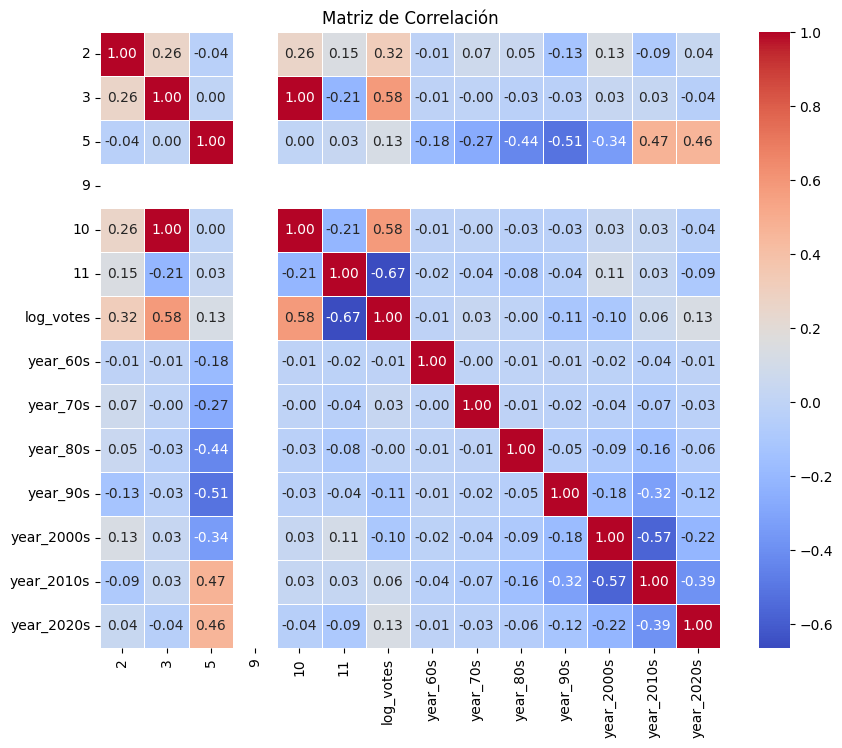

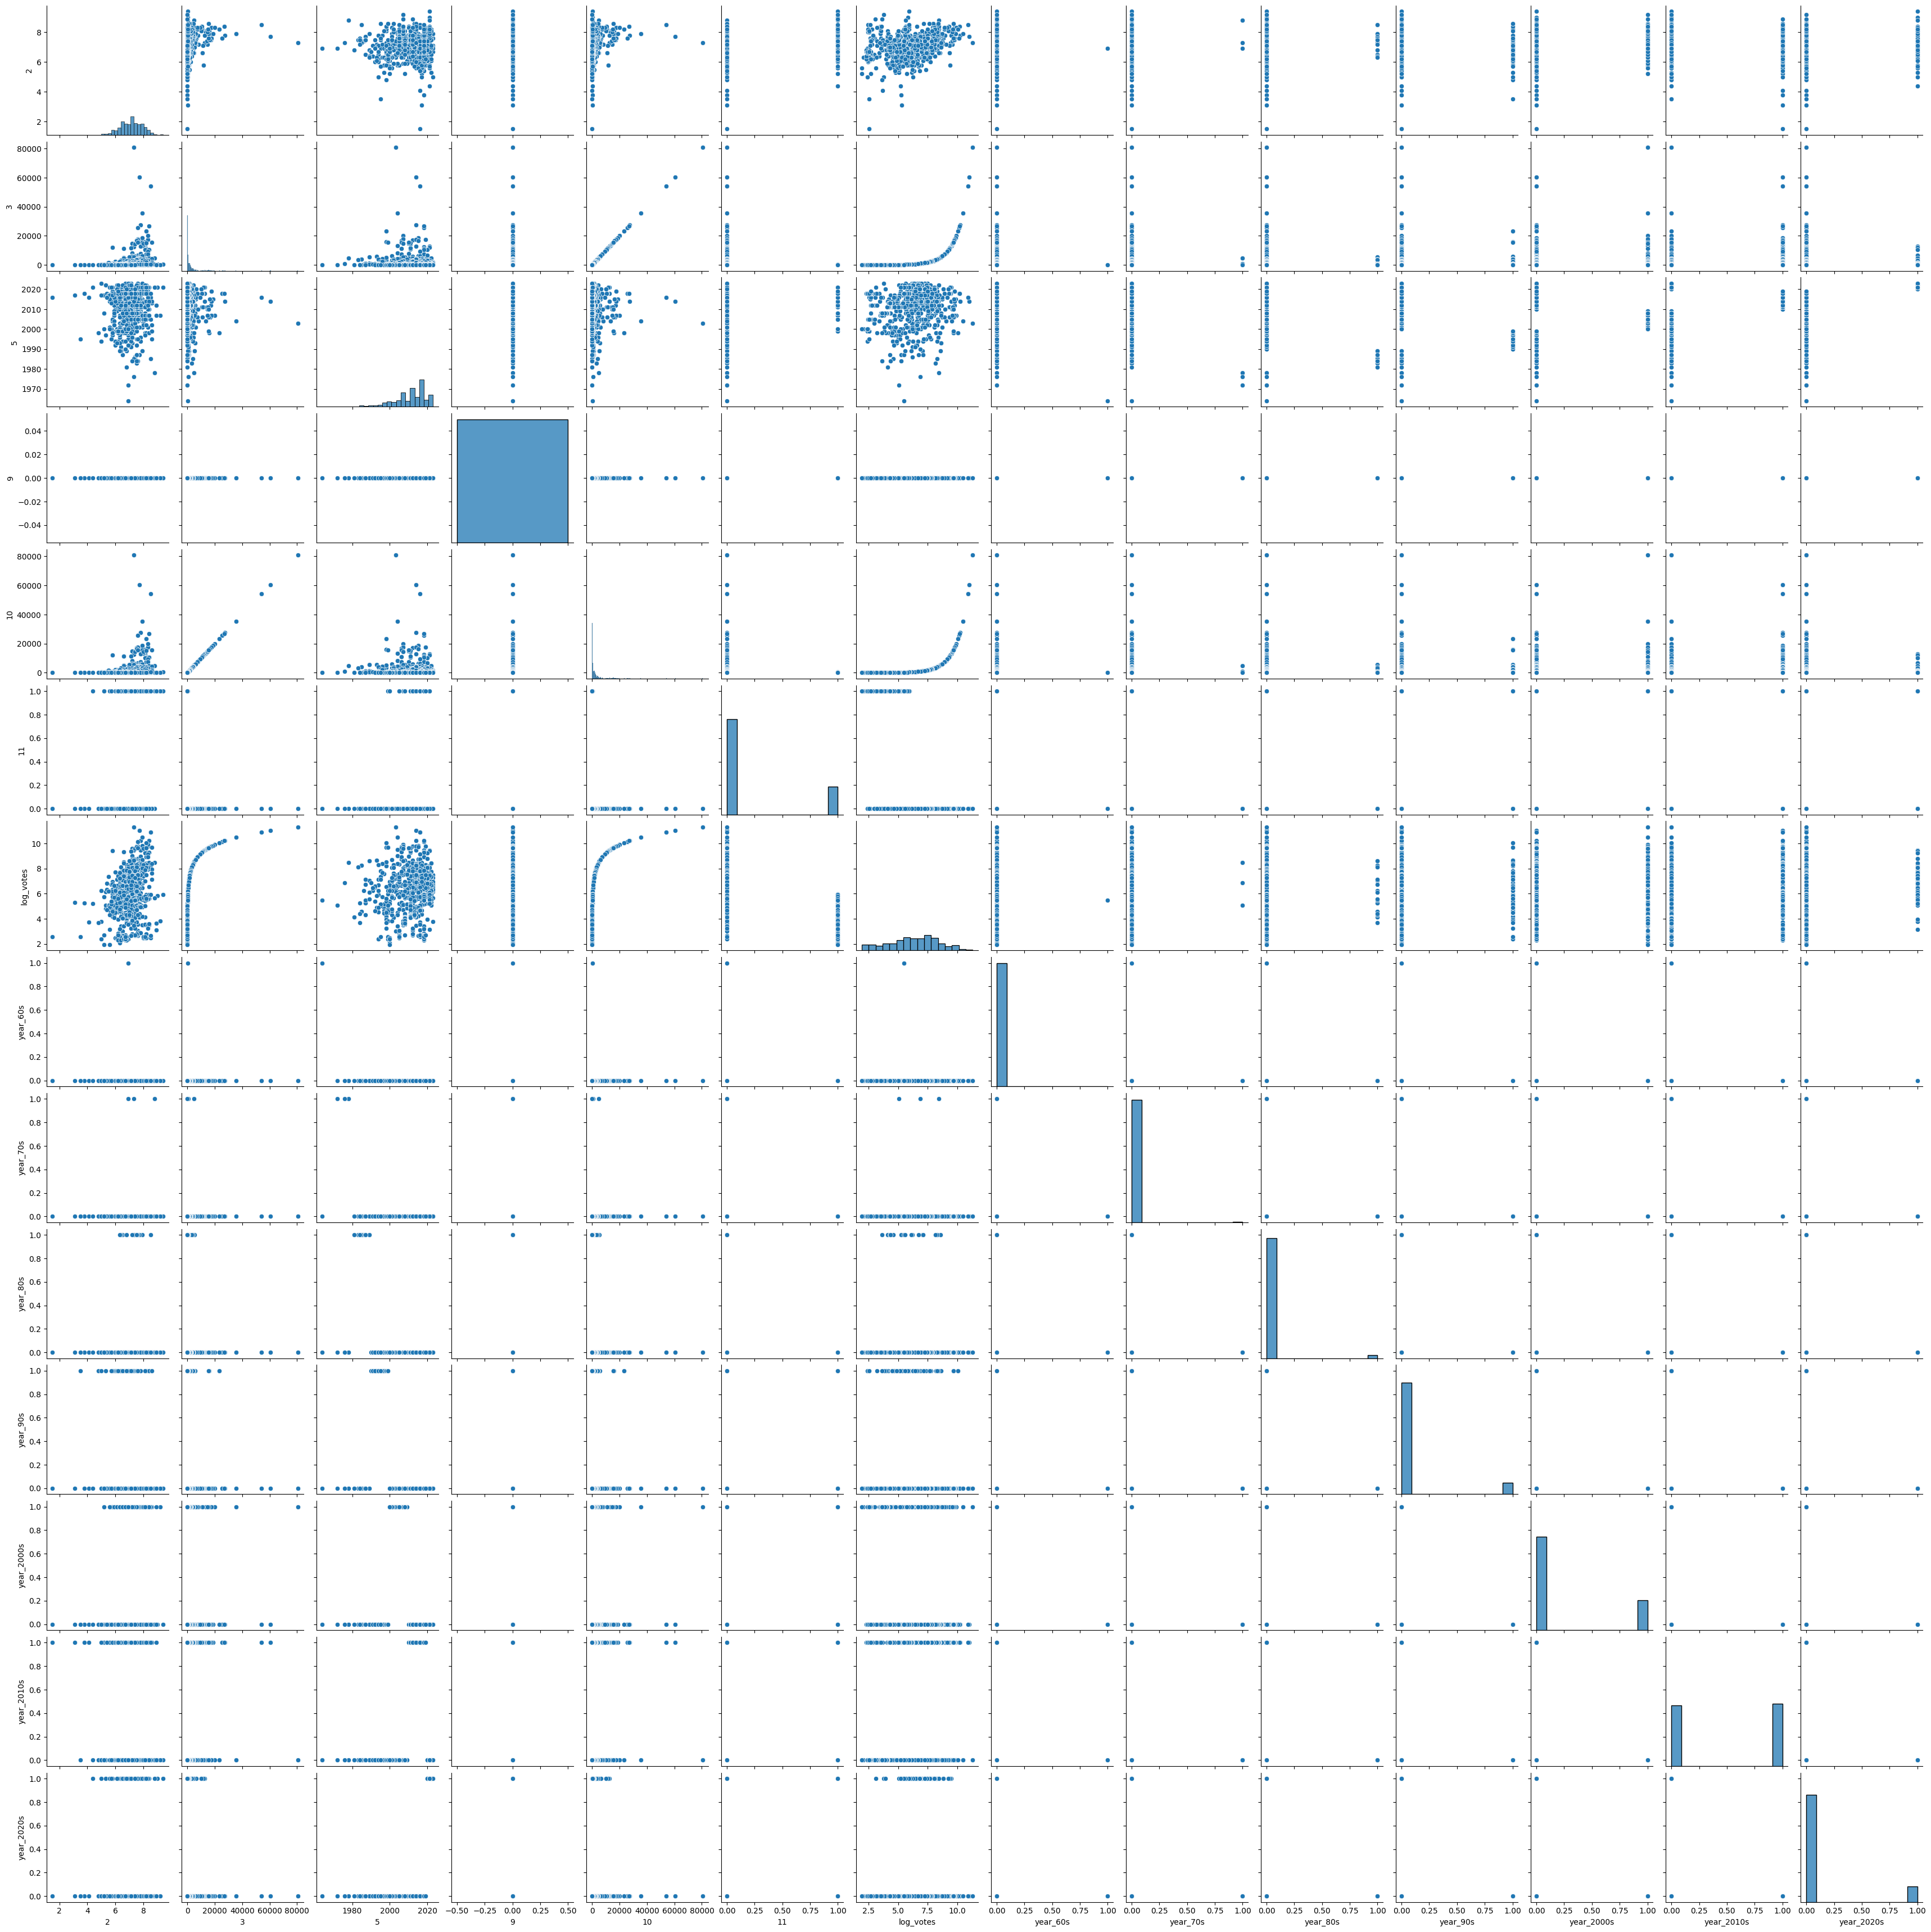

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

#FernandoSanchez Cargar datos
anime_data = pd.read_excel("anime_data_transformed.xlsx")

#FernandoSanchez Excluir columnas no numéricas
numeric_columns = anime_data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = anime_data[numeric_columns]

#FernandoSanchez Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

#FernandoSanchez Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()
"""Utilice este metodo ya que con las dispersiones que generare despues de este texto puedo notar la confirmacion de correlaciones"""
#FernandoSanchez Gráficos de dispersión entre todas las variables numéricas
sns.pairplot(numeric_data)
plt.show()

"""Los graficos me confirman la correlacion vista en la matriz"""


6. Genera una función que resuma todo el procesamiento necesario para el dataset,
que lea el dataset original y entregue un dataset ya tratado, con las columnas
transformadas y creadas.

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def procesar_dataset(nombre_archivo):
    #FernandoSanchez Leer el dataset original
    anime_data = pd.read_excel(nombre_archivo)
    
    #FernandoSanchez Eliminar valores atípicos
    z_scores = np.abs(stats.zscore(anime_data.select_dtypes(include=[np.number])))
    outlier_indices = np.where(z_scores > 3)
    anime_data = anime_data.drop(outlier_indices[0])
    
    #FernandoSanchez Revisar y tratar valores nulos
    anime_data.fillna(0, inplace=True)
    
    #FernandoSanchez Convertir la columna "Number of Votes" a tipo numérico y eliminar filas con valores no numéricos
    anime_data['Number of Votes'] = pd.to_numeric(anime_data['Number of Votes'], errors='coerce')
    anime_data = anime_data.dropna(subset=['Number of Votes'])
    
    #FernandoSanchez Convertir la columna "Year" a tipo numérico y eliminar filas con valores no numéricos
    anime_data['Year'] = pd.to_numeric(anime_data['Year'], errors='coerce')
    anime_data = anime_data.dropna(subset=['Year'])
    
    #FernandoSanchez Transformación de la variable "Number of Votes" con logaritmo
    anime_data['log_votes'] = anime_data['Number of Votes'].apply(lambda x: np.log1p(x))
    
    #FernandoSanchez Transformación de la variable "Year" en variables binarias por décadas
    anime_data['year_60s'] = anime_data['Year'].apply(lambda x: 1 if x >= 1960 and x < 1970 else 0)
    anime_data['year_70s'] = anime_data['Year'].apply(lambda x: 1 if x >= 1970 and x < 1980 else 0)
    anime_data['year_80s'] = anime_data['Year'].apply(lambda x: 1 if x >= 1980 and x < 1990 else 0)
    anime_data['year_90s'] = anime_data['Year'].apply(lambda x: 1 if x >= 1990 and x < 2000 else 0)
    anime_data['year_2000s'] = anime_data['Year'].apply(lambda x: 1 if x >= 2000 and x < 2010 else 0)
    anime_data['year_2010s'] = anime_data['Year'].apply(lambda x: 1 if x >= 2010 and x < 2020 else 0)
    anime_data['year_2020s'] = anime_data['Year'].apply(lambda x: 1 if x >= 2020 else 0)
    
    #FernandoSanchez Completar valores nulos en "Episode Title" con "Unknown"
    anime_data['Episode Title'].fillna('Unknown', inplace=True)
    
    #FernandoSanchez Verificar si la columna "Content Rating" está presente en el DataFrame
    if 'Content Rating' in anime_data.columns:
        #FernandoSanchez Codificación one-hot para la variable categórica "Content Rating"
        content_rating_dummies = pd.get_dummies(anime_data['Content Rating'], prefix='content_rating')
        #FernandoSanchez Concatenar las variables dummy al DataFrame original
        anime_data = pd.concat([anime_data, content_rating_dummies], axis=1)
        #FernandoSanchez Eliminar la columna original de "Content Rating"
        anime_data.drop(['Content Rating'], axis=1, inplace=True)
    
    #FernandoSanchez Guardar el DataFrame transformado en un nuevo archivo Excel
    anime_data.to_excel("anime_data_transformed.xlsx", index=False)
    
    return anime_data

#FernandoSanchez Utilizar la función para procesar el dataset
anime_data_procesado = procesar_dataset("imdb_anime.xlsx")


7. A partir de las columnas que obtuviste realiza una selección de variables según los
siguientes métodos:
a. Filtros basados en correlaciones
b. Forward Selection.
Compara ambos métodos y responde si coincide lo resultante con lo obtenido en el
análisis exploratorio.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#FernandoSanchez Cargar el conjunto de datos con las características numéricas y la variable objetivo
anime_data = pd.read_excel("anime_data_transformed.xlsx")

#FernandoSanchez Convertir la columna 'Runtime' a valores numéricos
anime_data['Runtime'] = anime_data['Runtime'].str.replace(' min', '').astype(float)

#FernandoSanchez Definir las características numéricas y la variable objetivo
X = anime_data[['User Rating', 'Number of Votes', 'Runtime', 'Metascore', 'Gross']]
y = anime_data['User Rating']

#FernandoSanchez Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Completar los valores faltantes en X_train y X_test con la media de cada columna
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

#FernandoSanchez a. Filtros basados en correlaciones
correlation_matrix = X_train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
filtered_X_train_correlation = X_train.drop(high_correlation_features, axis=1)

#FernandoSanchez b. Forward Selection
selected_features = []
best_score = 0
remaining_features = list(X_train.columns)
while remaining_features:
    scores = []
    for feature in remaining_features:
        model = LinearRegression()
        model.fit(X_train[selected_features + [feature]], y_train)
        y_pred = model.predict(X_test[selected_features + [feature]])
        score = mean_squared_error(y_test, y_pred)
        scores.append((score, feature))
    scores.sort(reverse=True)
    best_score, best_feature = scores.pop()
    if best_score > best_score:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
    else:
        break
filtered_X_train_forward_selection = X_train[selected_features]

#FernandoSanchez Comparación
print("Variables seleccionadas por Filtros basados en correlaciones:", filtered_X_train_correlation.columns)
print("Variables seleccionadas por Forward Selection:", filtered_X_train_forward_selection.columns)

"""El desafio esta bastante confuso ni siquiera se entiende como quieren la consecutividad de los pasos, no se explican bien y llega a confundir bastante"""

Variables seleccionadas por Filtros basados en correlaciones: Index(['User Rating', 'Number of Votes', 'Runtime', 'Metascore'], dtype='object')
Variables seleccionadas por Forward Selection: Index([], dtype='object')
